In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
heart = pd.read_csv('heart.csv')

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


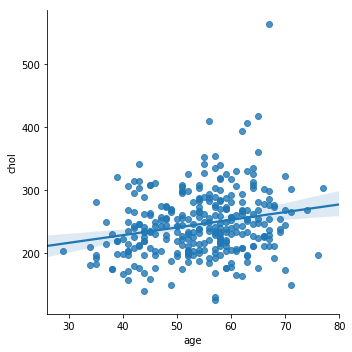

In [59]:
sns.lmplot(data=heart,x='age',y='chol')

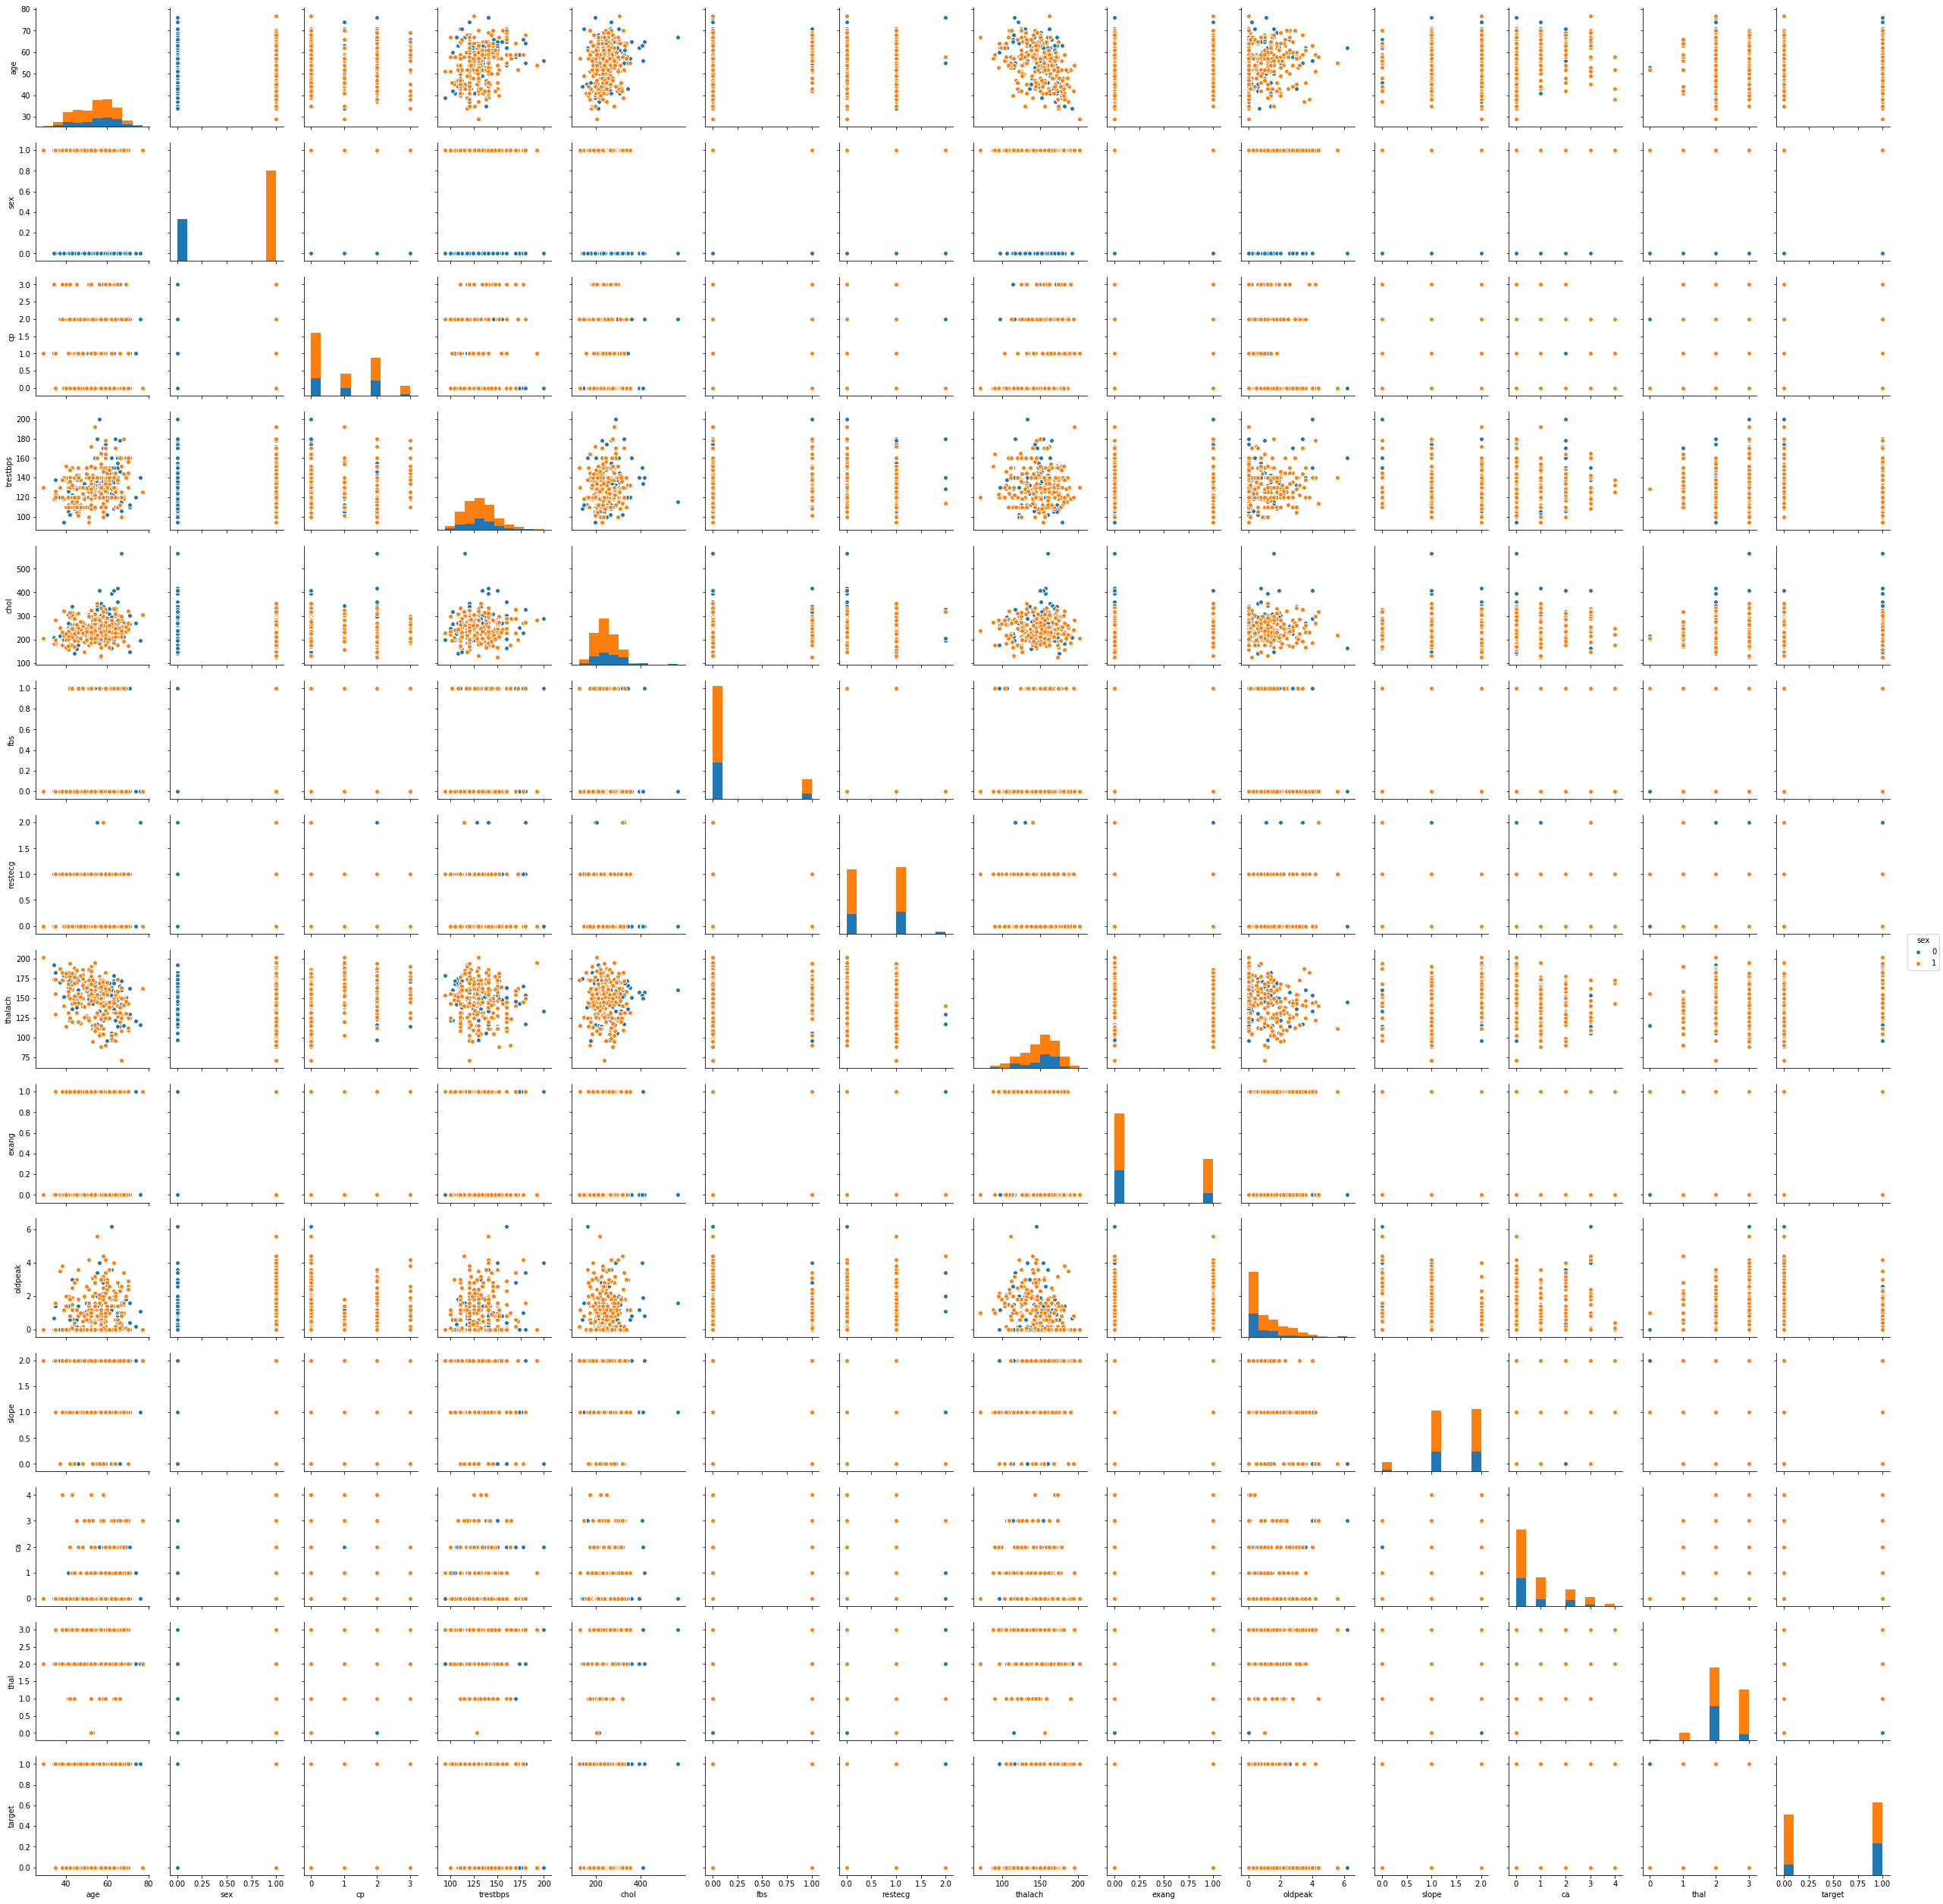

In [58]:
sns.pairplot(heart,hue='sex')

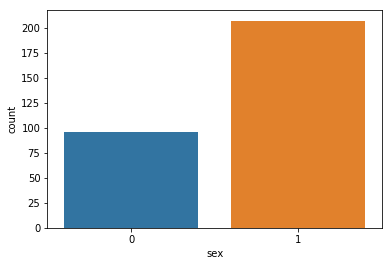

In [15]:
sns.countplot(data=heart,x='sex')

C:\Users\Pranav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


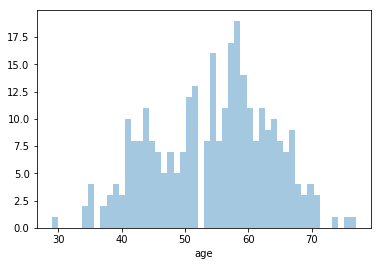

In [19]:
sns.distplot(heart['age'],kde=False,bins=50)

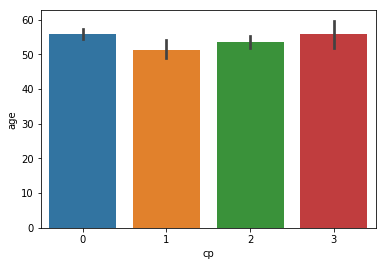

In [21]:
sns.barplot(data=heart,x='cp',y='age')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [30]:
sc.fit(heart.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
heart_s = sc.transform(heart.drop('target',axis=1))

In [42]:
heart_sc = pd.DataFrame(data=heart_s,columns=heart.columns[:-1])

In [43]:
heart_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [7]:
from sklearn.model_selection import train_test_split

In [45]:
X = heart_sc
y = heart['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
pred = lr.predict(X_test)

In [54]:
pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print(confusion_matrix(y_test,pred))

[[35  9]
 [ 4 43]]


In [57]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.90      0.80      0.84        44
          1       0.83      0.91      0.87        47

avg / total       0.86      0.86      0.86        91



In [68]:
#trying out Logistic regression model without Scaling the data, performs slightly better

In [8]:
X = heart.drop('target',axis=1)
y = heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [62]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
predd = lr.predict(X_test)

In [64]:
print(confusion_matrix(y_test,predd))

[[35  9]
 [ 2 45]]


In [65]:
print(classification_report(y_test,predd))

             precision    recall  f1-score   support

          0       0.95      0.80      0.86        44
          1       0.83      0.96      0.89        47

avg / total       0.89      0.88      0.88        91



In [69]:
#statmodel

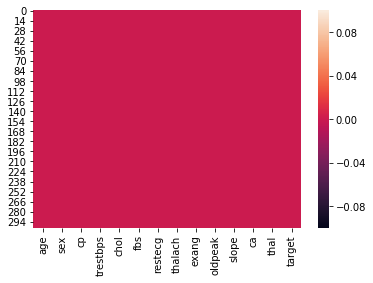

In [74]:
sns.heatmap(heart.isnull())

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=10)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
predF = rfc.predict(X_test)

In [28]:
print(confusion_matrix(y_test,predF))

[[36  8]
 [ 9 38]]


In [29]:
print(classification_report(y_test,predF))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81        44
          1       0.83      0.81      0.82        47

avg / total       0.81      0.81      0.81        91



In [31]:
import statsmodels.api as sm

In [32]:
m = sm.OLS(endog=heart['target'],exog=heart.drop('target',axis=1))

In [33]:
res = m.fit()

In [34]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     76.48
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           1.48e-85
Time:                        19:40:26   Log-Likelihood:                -112.42
No. Observations:                 303   AIC:                             250.8
Df Residuals:                     290   BIC:                             299.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0031      0.002      1.344      0.1